## Project No1 - The Mind [Dawn Lu]

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import beta

random.seed(10)

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k, with_replacement=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=with_replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[22, 82, 98],
       [23, 58, 70],
       [10, 18, 73],
       [40, 41, 42],
       [ 7,  9, 56],
       [19, 63, 80]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([22, 82, 98]), array([23, 58, 70]))

The lowest card in the game is

In [5]:
np.min(cards)

7

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [7]:
## define params & function
N = 100
n = 6
k = 3

def get_lowest_cards(num_iter, N, n, k, with_replacement=False):
    lowest_cards = []
    for _ in np.arange(num_iter):
        cards = sample_cards(N, n, k, with_replacement)
        lowest_card = np.min(cards)
        lowest_cards.append(lowest_card)
    return lowest_cards

In [8]:
## simulate lowest cards
num_iter = 100000
lowest_cards = get_lowest_cards(num_iter, N, n, k)

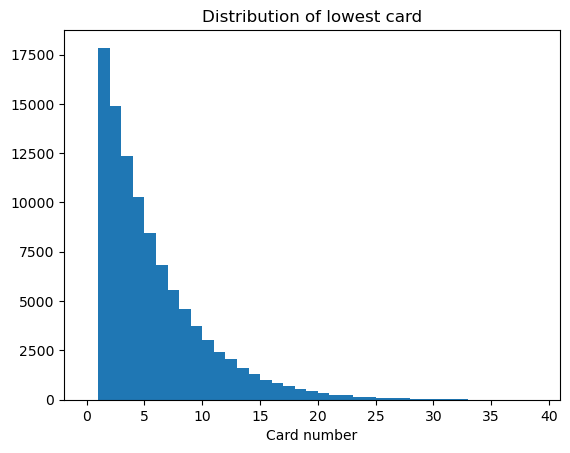

In [9]:
plt.hist(lowest_cards, bins = np.arange(0,40))
plt.xlabel('Card number')
plt.title('Distribution of lowest card')
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [10]:
def run_simulation_max_gap(num_iter, N, n, k):
    max_gaps = []
    for i in np.arange(num_iter):
        cards = sample_cards(N, n, k)
        sorted_cards = np.sort(cards.flatten())
        gaps = []
        for i in np.arange(len(sorted_cards)):
            if i > 0:
                gap = sorted_cards[i] - sorted_cards[i-1]
                gaps.append(gap)
        max_gap = np.max(gaps)
        max_gaps.append(max_gap)
    return max_gaps

In [11]:
## run simulation
num_iter = 100000
max_gap_list = run_simulation_max_gap(num_iter, N, n, k)

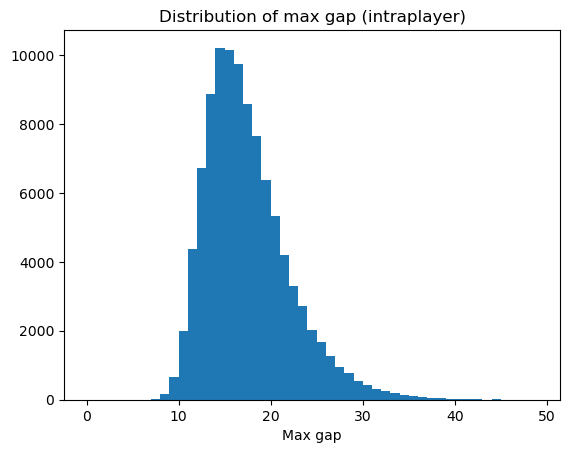

mean = 17.00047


In [12]:
## plot results
plt.hist(max_gap_list, bins = np.arange(0,50))
plt.xlabel('Max gap')
plt.title('Distribution of max gap (intraplayer)')
plt.show()

print("mean =", np.mean(max_gap_list))

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [13]:
def create_card_player_tuples(n, cards):
    cards_tuple = []
    for p in np.arange(n):
        player_cards = cards[p]
        for c in player_cards:
            tup = (c,p)
            cards_tuple.append(tup)
    cards_tuple.sort()
    return cards_tuple

def get_max_interplayer_gap(cards_tuple):
    gaps = []
    for i in np.arange(1, len(cards_tuple)):
        gap = cards_tuple[i][0] - cards_tuple[i-1][0]
        if cards_tuple[i][1] != cards_tuple[i-1][1]:
            gaps.append(gap)

    return np.max(gaps)

def run_simulation_max_interplayer_gap(num_iter, N, n, k):
    max_interplayer_gaps = []

    for i in np.arange(num_iter):
        cards = sample_cards(N, n, k)
        card_player_tuples = create_card_player_tuples(n, cards)
        max_gap = get_max_interplayer_gap(card_player_tuples)
        max_interplayer_gaps.append(max_gap)
    return max_interplayer_gaps

In [14]:
## run simulation
num_iter = 100000
max_interplayer_gap_list = run_simulation_max_interplayer_gap(num_iter, N, n, k)

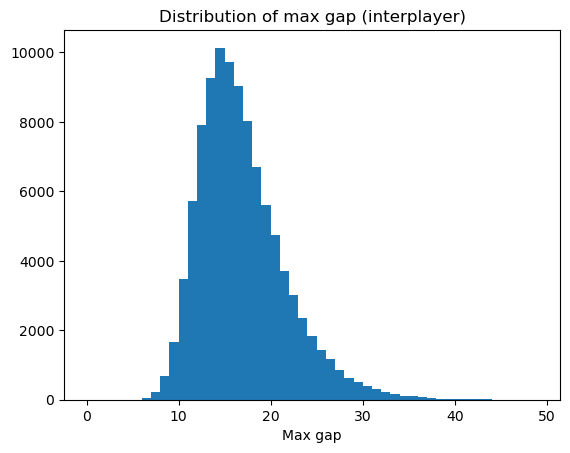

mean = 16.40681


In [15]:
## plot results
plt.hist(max_interplayer_gap_list, bins = np.arange(0,50))
plt.xlabel('Max gap')
plt.title('Distribution of max gap (interplayer)')
plt.show()
print("mean =", np.mean(max_interplayer_gap_list))

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

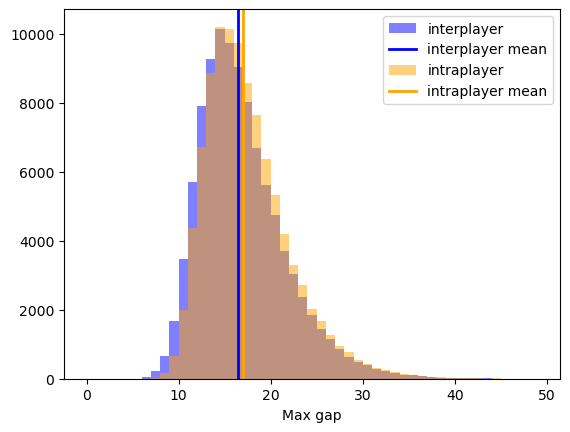

In [16]:
## compare inter-player and intra-player gaps
plt.hist(max_interplayer_gap_list,  alpha = 0.5, color='blue', bins = np.arange(0,50), label = 'interplayer')
plt.axvline(x=np.mean(max_interplayer_gap_list), color='blue', linewidth=2, label='interplayer mean')

plt.hist(max_gap_list, alpha = 0.5, bins = np.arange(0,50), color='orange', label = 'intraplayer')
plt.axvline(x=np.mean(max_gap_list), color='orange', linewidth=2, label='intraplayer mean')

plt.xlabel('Max gap')
plt.legend()
plt.show()

In [17]:
## create a table of the different variations

def get_mean_diffs(n_players_list, k_cards_list, num_iter = 10000):
    n_dict = {}
    for n in n_players_list:
        n_results_list = []

        for k in k_cards_list:
            max_gap_list = run_simulation_max_gap(num_iter, N, n, k)
            max_interplayer_gap_list = run_simulation_max_interplayer_gap(num_iter, N, n, k)
            diff_mean = np.mean(max_gap_list) - np.mean(max_interplayer_gap_list)
            n_results_list.append(diff_mean)

        n_dict[n] = n_results_list
    return n_dict

In [18]:
## show results in df
n_players_list = [2, 4, 6, 8]
k_cards_list = [3, 5, 7, 9]

n_dict = get_mean_diffs(n_players_list, k_cards_list)
df = pd.DataFrame(n_dict)
df.columns = ['n=%i' %i for i in n_players_list]
df.index = ['k=%i' %i for i in k_cards_list]

df

,n=2,n=4,n=6,n=8
k=3,7.2294,1.4999,0.6677,0.3035
k=5,5.3176,0.9794,0.4142,0.2462
k=7,3.8762,0.7781,0.3095,0.1531
k=9,3.1387,0.5114,0.1993,0.0840


Takeway: For a fixed k, as we increase the number of players, the mean decreases. Similarly, if we fix n, then as the number of cards (k) increases, then the mean decreases. This seems to make sense since as the total number of cards dealt increases, then the difference in max gaps should decrease.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [19]:
def lowest_card_greater5(num_trials, N, n, k):
    num_success = 0
    for _ in np.arange(num_trials):
        cards = sample_cards(N, n, k)
        lowest_card = np.min(cards)
        if lowest_card > 5:
            num_success += 1
    return num_success

In [20]:
## run simulation 
num_iter = 10000
num_trials = 10
num_success_list = []

for _ in np.arange(num_iter):
    num_success = lowest_card_greater5(num_trials, 100, 4, 5)
    num_success_list.append(num_success)

mean = 3.2017


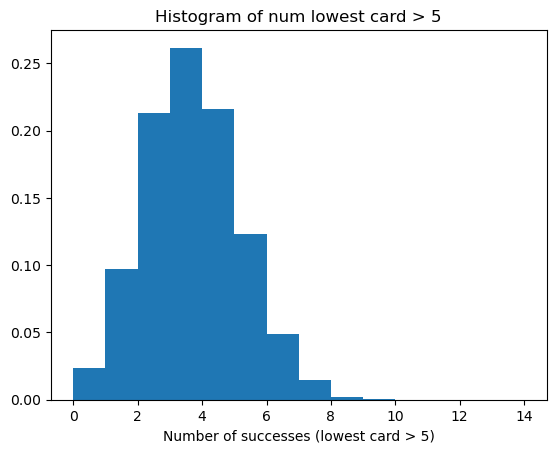

In [21]:
plt.hist(num_success_list, bins = np.arange(0,15), density=True)
print('mean = {}'.format(np.mean(num_success_list)))

plt.title('Histogram of num lowest card > 5')
plt.xlabel('Number of successes (lowest card > 5)')
plt.show()

In [22]:
## Find p using the empirical mean
p = np.mean(num_success_list)/num_trials
print('p = {}'.format(round(p, 3)))

p = 0.32


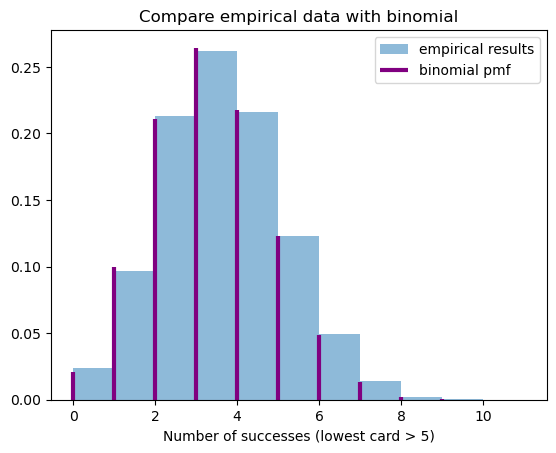

In [23]:
## compare with binomial distribution

# plot histogram of simulations
plt.hist(num_success_list, bins = np.arange(0,12), density=True, alpha=0.5, label='empirical results')

# plot binomial pmf 
x = np.arange(0, num_trials + 1)
rv = binom(num_trials, p)
plt.vlines(x, 0, rv.pmf(x), colors='purple', linestyles='-', lw=3, label='binomial pmf')

plt.xlabel('Number of successes (lowest card > 5)')
plt.title('Compare empirical data with binomial')
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

In [24]:
## get beta distribution pdf
a = 1
b = 18 + 1 - a

x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
beta_pdf = beta.pdf(x, a, b)

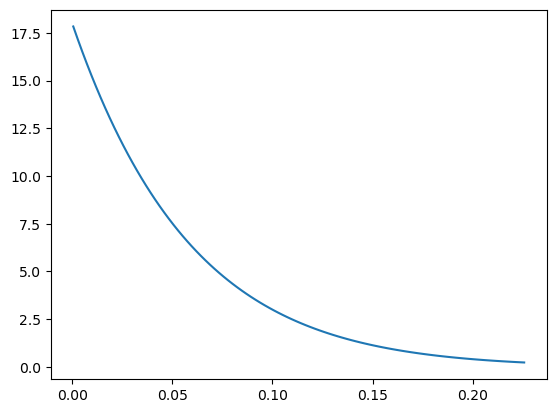

In [25]:
plt.plot(x, beta_pdf, label = 'beta distribution')
plt.show()

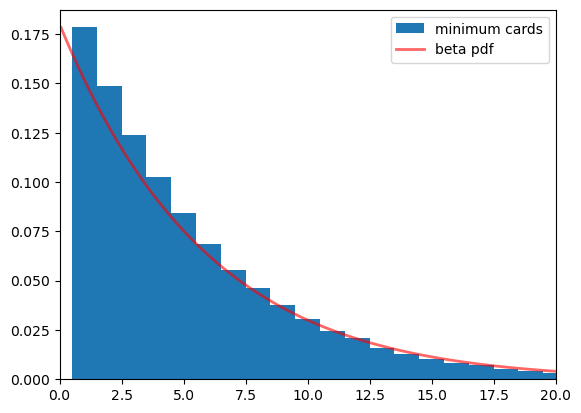

In [26]:
## Compare histogram with beta pdf
plt.hist(lowest_cards, bins = np.arange(0.5, 100.5, 1.0), density=True, label='minimum cards')

plt.plot(x*100, beta_pdf/100,
       'r-', lw=2, alpha=0.6, label='beta pdf')

plt.xlim(0,20)
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

In [27]:
## calculate transformed variable
transformed_rv = -np.log(1-(np.array(lowest_cards)/100))

In [28]:
## get exponential pdf 
lambda_param = 18
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
expon_pdf = expon.pdf(x, scale=1/lambda_param)

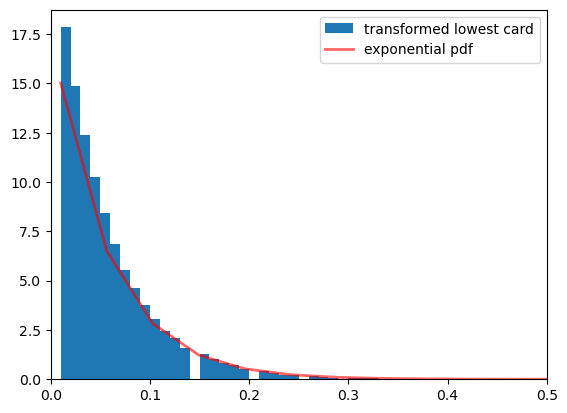

In [29]:
## plot empirical results vs. exponential pdf
plt.hist(transformed_rv, bins=np.arange(0, 0.5, 0.01), density=True, label='transformed lowest card')
plt.plot(x, expon_pdf,'r-', lw=2, alpha=0.6, label='exponential pdf')

plt.xlim((0,0.5))
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

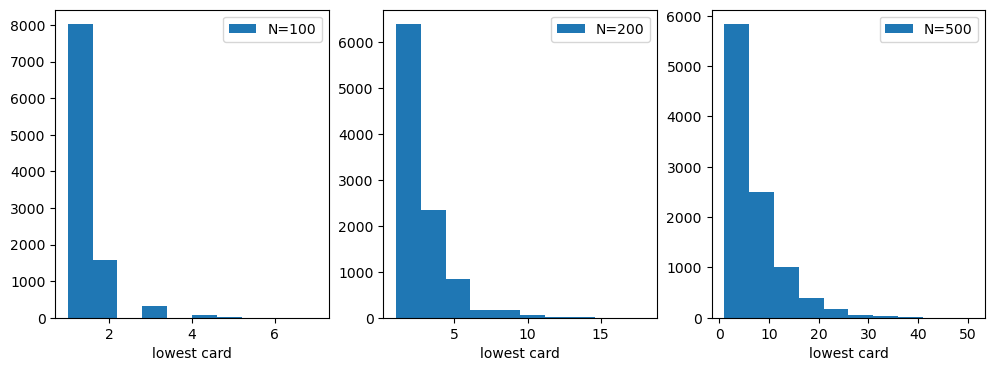

In [30]:
## What happens if we increase the num of cards per player? Look at lowest card distribution
num_iter = 10000
N_list = [100, 200, 500]
n = 8
k = 10

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

for i in np.arange(len(N_list)):
    N = N_list[i]
    lowest_cards = get_lowest_cards(num_iter, N, n, k)
    ax = axes[i]
    ax.hist(lowest_cards, label='N={}'.format(N))
    ax.set_xlabel('lowest card')
    ax.legend()

plt.show()

We observe that as we increase N, the distribution of the lowest card looks closer to a beta distribution

In order to compare what happens with vs. without replacement, we'll look at two different scenarios:
- Senario 1: n*k << N
- Senario 2: n*k ~ N

In [31]:
## Scenario 1: n*k << N
num_iter = 10000
N = 100
n = 6
k = 3

lowest_cards_without_replace = get_lowest_cards(num_iter, N, n, k)
lowest_cards_with_replace = get_lowest_cards(num_iter, N, n, k, with_replacement=True)

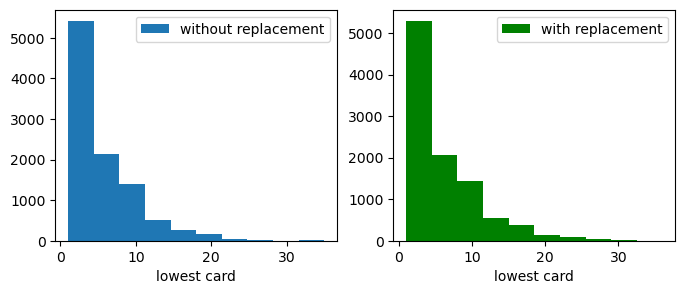

In [32]:
## plot scenario 1 comparison
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.flatten()

axes[0].hist(lowest_cards_without_replace, label='without replacement')
axes[0].set_xlabel('lowest card')
axes[0].legend()

axes[1].hist(lowest_cards_with_replace, color='green', label='with replacement')
axes[1].set_xlabel('lowest card')
axes[1].legend()

plt.show()

In [33]:
## Scenario 2: n*k ~ N
num_iter = 10000
N = 100
n = 9
k = 10

lowest_cards_without_replace = get_lowest_cards(num_iter, N, n, k)
lowest_cards_with_replace = get_lowest_cards(num_iter, N, n, k, with_replacement=True)

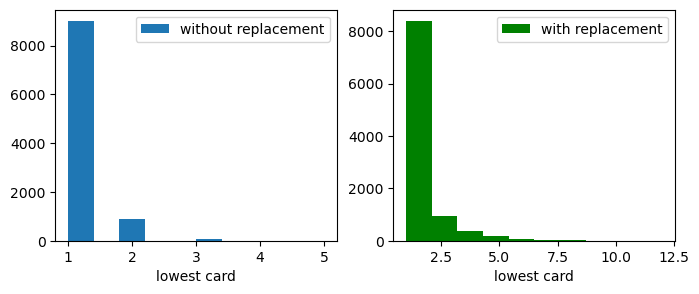

In [34]:
## plot scenario 2 comparison
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.flatten()

axes[0].hist(lowest_cards_without_replace, label='without replacement')
axes[0].set_xlabel('lowest card')
axes[0].legend()

axes[1].hist(lowest_cards_with_replace, color='green', label='with replacement')
axes[1].set_xlabel('lowest card')
axes[1].legend()

plt.show()

Based on the graphs above, we see that the distributions for with vs. without replacement are similar when n*k << N. This makes sense intuitively since when the number of total cards dealt are small relative to the deck, then the likelihood of sampling the same card is small. However, if the total number of cards dealt is close to the size of the deck, then the likelihood of sampling the same card is much higher, which explains why the distributions differ more. 

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Austin Tao
- Member No2: 
- Member No3: